In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers.legacy import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))

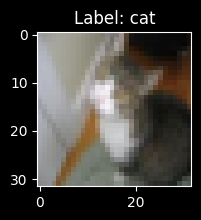

In [9]:
plot_sample(101)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(32, 32, 3), name="input_layer"),
        Dense(1600, activation="sigmoid", name="hidden_layer_1"),
        Dense(800, activation="sigmoid", name="hidden_layer_2"),
        Dense(400, activation="sigmoid", name="hidden_layer_3"),
        Dense(200, activation="sigmoid", name="hidden_layer_4"),
        Dense(100, activation="sigmoid", name="hidden_layer_5"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-03 13:47:59.911871: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-03 13:47:59.911919: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-03 13:47:59.911931: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-03 13:47:59.911981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-03 13:47:59.912012: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 1600)              4916800   
                                                                 
 hidden_layer_2 (Dense)      (None, 800)               1280800   
                                                                 
 hidden_layer_3 (Dense)      (None, 400)               320400    
                                                                 
 hidden_layer_4 (Dense)      (None, 200)               80200     
                                                                 
 hidden_layer_5 (Dense)      (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 10)                1010    

In [14]:
optimizer = Adam()
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann.h5",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs", histogram_freq=1, write_images=True
)
epochs = 10
ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[ann_checkpoint_callback, ann_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:48:04.964349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.1317 - accuracy: 0.1683

2023-08-03 13:48:37.274863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 37s 25ms/step - loss: 2.1317 - accuracy: 0.1683 - val_loss: 2.0628 - val_accuracy: 0.2042
Epoch 2/10
1407/1407 [==============================] - 32s 22ms/step - loss: 2.0569 - accuracy: 0.1922 - val_loss: 2.0368 - val_accuracy: 0.2108
Epoch 3/10
1407/1407 [==============================] - 33s 24ms/step - loss: 2.0371 - accuracy: 0.2032 - val_loss: 2.0217 - val_accuracy: 0.2064
Epoch 4/10
1407/1407 [==============================] - 43s 30ms/step - loss: 2.0277 - accuracy: 0.2077 - val_loss: 2.0346 - val_accuracy: 0.2146
Epoch 5/10
1407/1407 [==============================] - 34s 24ms/step - loss: 2.0158 - accuracy: 0.2105 - val_loss: 2.0156 - val_accuracy: 0.2116
Epoch 6/10
1407/1407 [==============================] - 49s 35ms/step - loss: 2.0026 - accuracy: 0.2220 - val_loss: 2.0449 - val_accuracy: 0.2014
Epoch 7/10
1407/1407 [==============================] - 56s 40ms/step - loss: 1.9913 - accuracy: 0.2238 - val_loss: 2.0394 - val_accura

In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 2.0176567792892457
Validation loss: 2.016908144950867
0.213029 Training accuracy with a standard deviation of 0.021163
0.217880 Validation accuracy with a standard deviation of 0.015081


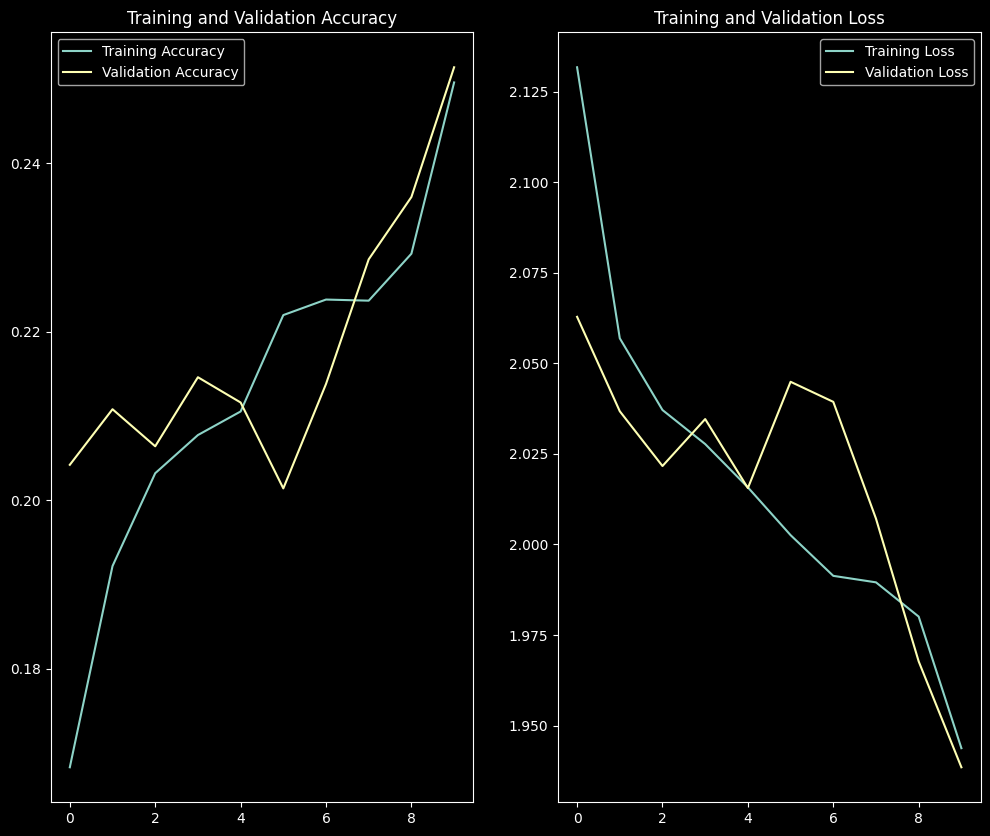

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 1.9276 - accuracy: 0.2572
Test loss: 1.9276113510131836
Test accuracy: 0.2572000026702881


In [19]:
y_pred = ann.predict(X_test)

 16/313 [>.............................] - ETA: 2s

2023-08-03 13:55:34.321755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            activation="relu",
            input_shape=(32, 32, 3),
            name="conv_layer_1",
        ),
        AveragePooling2D((2, 2), name="pooling_layer_1"),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu", name="conv_layer_2"),
        AveragePooling2D((2, 2), name="pooling_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(1600, activation="sigmoid", name="dense_layer_1"),
        Dense(800, activation="sigmoid", name="dense_layer_2"),
        Dense(400, activation="sigmoid", name="dense_layer_3"),
        Dense(200, activation="sigmoid", name="dense_layer_4"),
        Dense(100, activation="sigmoid", name="dense_layer_5"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 30, 30, 32)        896       
                                                                 
 pooling_layer_1 (AveragePo  (None, 15, 15, 32)        0         
 oling2D)                                                        
                                                                 
 conv_layer_2 (Conv2D)       (None, 13, 13, 64)        18496     
                                                                 
 pooling_layer_2 (AveragePo  (None, 6, 6, 64)          0         
 oling2D)                                                        
                                                                 
 flatten_layer (Flatten)     (None, 2304)              0         
                                                                 
 dense_layer_1 (Dense)       (None, 1600)              3688000 

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn.h5",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs", histogram_freq=1, write_images=True
)
cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[cnn_checkpoint_callback, cnn_tensorboard_callback],
)

Epoch 1/10


2023-08-03 13:55:45.679856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 2.3104 - accuracy: 0.1006

2023-08-03 13:56:38.717480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 60s 41ms/step - loss: 2.3104 - accuracy: 0.1006 - val_loss: 2.3057 - val_accuracy: 0.0958
Epoch 2/10
1407/1407 [==============================] - 56s 40ms/step - loss: 2.3044 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.1024
Epoch 3/10
1407/1407 [==============================] - 51s 36ms/step - loss: 2.3042 - accuracy: 0.0977 - val_loss: 2.3034 - val_accuracy: 0.1058
Epoch 4/10
1407/1407 [==============================] - 49s 35ms/step - loss: 2.3037 - accuracy: 0.1001 - val_loss: 2.3044 - val_accuracy: 0.0986
Epoch 5/10
1407/1407 [==============================] - 49s 35ms/step - loss: 2.3035 - accuracy: 0.0978 - val_loss: 2.3049 - val_accuracy: 0.0950
Epoch 6/10
1407/1407 [==============================] - 50s 36ms/step - loss: 2.3035 - accuracy: 0.1002 - val_loss: 2.3037 - val_accuracy: 0.0976
Epoch 7/10
1407/1407 [==============================] - 48s 34ms/step - loss: 2.3036 - accuracy: 0.0987 - val_loss: 2.3029 - val_accura

In [25]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 2.3043902635574343
Validation loss: 2.303654670715332
0.099136 Training accuracy with a standard deviation of 0.001148
0.100820 Validation accuracy with a standard deviation of 0.004255


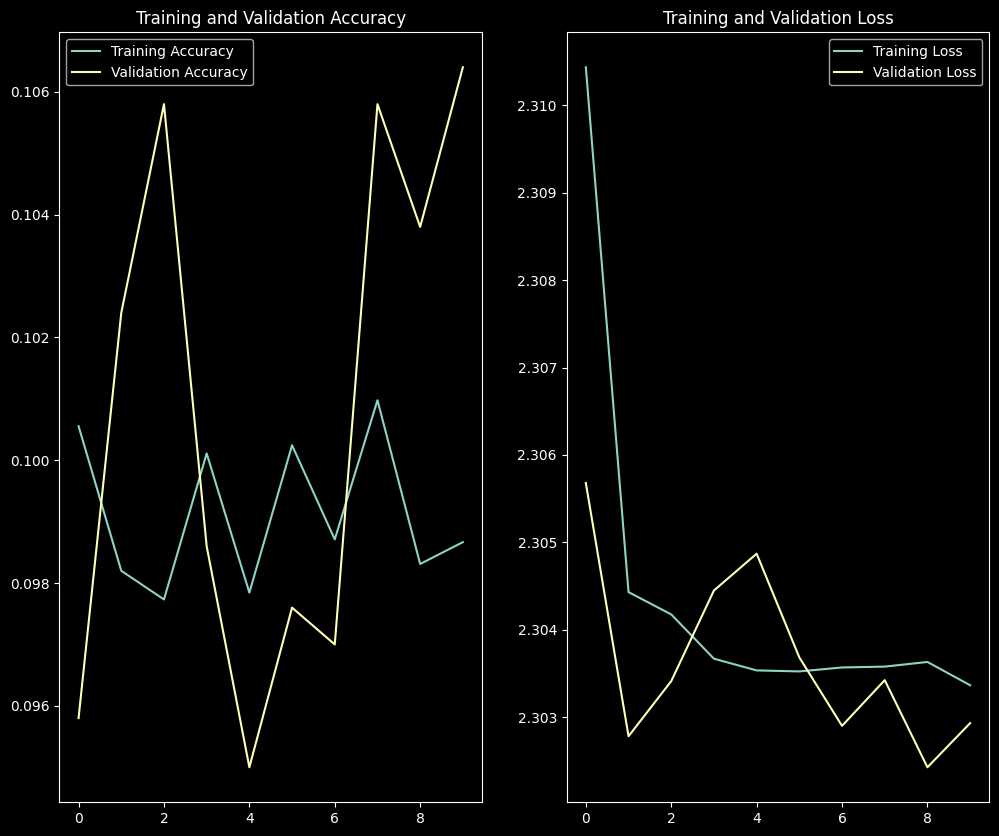

In [26]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 2.3028 - accuracy: 0.1000
Test loss: 2.30279278755188
Test accuracy: 0.10000000149011612


In [28]:
y_pred = cnn.predict(X_test)

  1/313 [..............................] - ETA: 1:23

2023-08-03 14:04:26.284090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step
